In [1]:
import numpy as np
f = open('resources/InsectWingbeatSound/InsectWingbeatSound_TEST','r')
data = f.read()
f.close()
# 개행문자 기준으로 끊어서 리스트로
data_list = data.split('\n')

# "," 기준으로 끊어서 리스트로
emptylist = []
for list_part in data_list:
    emptylist.append(list_part.split(","))

In [2]:
# str -> float 변환
tofloat = []
for partlist in emptylist:
    tofloat.append([float(i) for i in partlist]) 

In [3]:
labels = []
data_list = []
for datas in tofloat:
    labels.append(datas[0])
    data_list.append(datas[1:])
print(np.shape(labels))
print(np.shape(data_list))


(1980,)
(1980, 256)


In [4]:
from readFile import split_into_values, toRPdata
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

def Standard(data):
    SS = StandardScaler().fit(data)
    scaled = SS.transform(data)
    return scaled

def MinMax(data):
    MMS = MinMaxScaler().fit(data)
    scaled = MMS.transform(data)
    return scaled

# result_list transpose
result_T = [list(x) for x in zip(*data_list)]

# minmax 정규화
result_scaled = Standard(result_T)

# 다시 result transpose 해서 원래대로
result_scaled = [list(x) for x in zip(*result_scaled)]

result_ = np.array(result_scaled)

In [5]:
result_.shape

(1980, 256)

In [6]:
data = result_.reshape(result_.shape[0], 1, result_.shape[1])
X = toRPdata(data, threshold='point', percentage=30)
#X = toRPdata(data)
    
X_scaled = np.expand_dims(X, axis=3)
X_scaled.shape

(1980, 256, 256, 1)

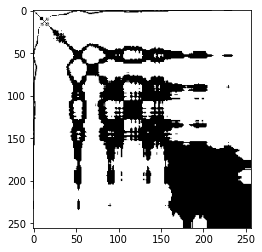

In [7]:
from matplotlib import pyplot as plt
plt.imshow(X[0], cmap='Greys')

In [8]:
learning_rate = 3e-5
optimizer='Adam'
loss='mse'
image_size = 256 #1024, 256
dimension = 8 # ...

In [9]:
from utils import split_data, normalization_tool
from agent import Autoencoder_Agent

X_train, X_test, Y_train, Y_test = split_data(X_scaled, X_scaled) #데이터 분리

autoencoder = Autoencoder_Agent(model_size=image_size, dimension=dimension, optimizer=optimizer,learning_rate=learning_rate)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 128)     1280      
_________________________________________________________________
activation (Activation)      (None, 256, 256, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      73792     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        1

In [10]:
batch_size = 10
epochs = 5000

In [11]:
hist = autoencoder.train(X_train,batch_size,epochs,X_test)

Epoch 1/5000
149/149 [==============================] - ETA: 0s - loss: 0.2216
Epoch 00001: val_loss improved from inf to 0.20451, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 24s 163ms/step - loss: 0.2216 - val_loss: 0.2045
Epoch 2/5000
149/149 [==============================] - ETA: 0s - loss: 0.2037
Epoch 00002: val_loss improved from 0.20451 to 0.20270, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 23s 151ms/step - loss: 0.2037 - val_loss: 0.2027
Epoch 3/5000
149/149 [==============================] - ETA: 0s - loss: 0.2021
Epoch 00003: val_loss improved from 0.20270 to 0.20111, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 22s 151ms/step - loss: 0.2021 - val_loss: 0.2011
Epoch 4/5000
149/149 [==============================] - ETA: 0s - loss: 0.2008
Epoch 00004: val_loss improved from 0.20111 to 0.20006, saving model to insectWing_dimension_8.h5
149/149 [===========

Epoch 32/5000
149/149 [==============================] - ETA: 0s - loss: 0.1914
Epoch 00032: val_loss improved from 0.19223 to 0.19220, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 24s 161ms/step - loss: 0.1914 - val_loss: 0.1922
Epoch 33/5000
149/149 [==============================] - ETA: 0s - loss: 0.1913
Epoch 00033: val_loss improved from 0.19220 to 0.19208, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 24s 161ms/step - loss: 0.1913 - val_loss: 0.1921
Epoch 34/5000
149/149 [==============================] - ETA: 0s - loss: 0.1912
Epoch 00034: val_loss improved from 0.19208 to 0.19197, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 24s 160ms/step - loss: 0.1912 - val_loss: 0.1920
Epoch 35/5000
149/149 [==============================] - ETA: 0s - loss: 0.1911
Epoch 00035: val_loss improved from 0.19197 to 0.19191, saving model to insectWing_dimension_8.h5
149/149 [===

Epoch 65/5000
149/149 [==============================] - ETA: 0s - loss: 0.1894
Epoch 00065: val_loss did not improve from 0.19098
149/149 [==============================] - 24s 163ms/step - loss: 0.1894 - val_loss: 0.1910
Epoch 66/5000
149/149 [==============================] - ETA: 0s - loss: 0.1894
Epoch 00066: val_loss improved from 0.19098 to 0.19091, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 25s 165ms/step - loss: 0.1894 - val_loss: 0.1909
Epoch 67/5000
149/149 [==============================] - ETA: 0s - loss: 0.1893
Epoch 00067: val_loss did not improve from 0.19091
149/149 [==============================] - 24s 162ms/step - loss: 0.1893 - val_loss: 0.1909
Epoch 68/5000
149/149 [==============================] - ETA: 0s - loss: 0.1892
Epoch 00068: val_loss improved from 0.19091 to 0.19084, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 24s 162ms/step - loss: 0.1892 - val_loss: 0.1908
Epoch 69/5000


Epoch 99/5000
149/149 [==============================] - ETA: 0s - loss: 0.1878
Epoch 00099: val_loss did not improve from 0.19023
149/149 [==============================] - 24s 161ms/step - loss: 0.1878 - val_loss: 0.1904
Epoch 100/5000
149/149 [==============================] - ETA: 0s - loss: 0.1878
Epoch 00100: val_loss did not improve from 0.19023
149/149 [==============================] - 24s 161ms/step - loss: 0.1878 - val_loss: 0.1903
Epoch 101/5000
149/149 [==============================] - ETA: 0s - loss: 0.1877
Epoch 00101: val_loss did not improve from 0.19023
149/149 [==============================] - 24s 164ms/step - loss: 0.1877 - val_loss: 0.1904
Epoch 102/5000
149/149 [==============================] - ETA: 0s - loss: 0.1877
Epoch 00102: val_loss improved from 0.19023 to 0.19014, saving model to insectWing_dimension_8.h5
149/149 [==============================] - 25s 165ms/step - loss: 0.1877 - val_loss: 0.1901
Epoch 103/5000
149/149 [==============================] - 

Epoch 134/5000
149/149 [==============================] - ETA: 0s - loss: 0.1867
Epoch 00134: val_loss did not improve from 0.18999
149/149 [==============================] - 24s 162ms/step - loss: 0.1867 - val_loss: 0.1900
Epoch 135/5000
149/149 [==============================] - ETA: 0s - loss: 0.1866
Epoch 00135: val_loss did not improve from 0.18999
149/149 [==============================] - 24s 164ms/step - loss: 0.1866 - val_loss: 0.1901
Epoch 136/5000
149/149 [==============================] - ETA: 0s - loss: 0.1866
Epoch 00136: val_loss did not improve from 0.18999
149/149 [==============================] - 24s 163ms/step - loss: 0.1866 - val_loss: 0.1901
Epoch 137/5000
149/149 [==============================] - ETA: 0s - loss: 0.1866
Epoch 00137: val_loss did not improve from 0.18999
149/149 [==============================] - 24s 161ms/step - loss: 0.1866 - val_loss: 0.1900
Epoch 138/5000
149/149 [==============================] - ETA: 0s - loss: 0.1865
Epoch 00138: val_loss i

Epoch 170/5000
149/149 [==============================] - ETA: 0s - loss: 0.1857
Epoch 00170: val_loss did not improve from 0.18990
149/149 [==============================] - 24s 162ms/step - loss: 0.1857 - val_loss: 0.1902
Epoch 171/5000
149/149 [==============================] - ETA: 0s - loss: 0.1856
Epoch 00171: val_loss did not improve from 0.18990
149/149 [==============================] - 24s 161ms/step - loss: 0.1856 - val_loss: 0.1901
Epoch 172/5000
149/149 [==============================] - ETA: 0s - loss: 0.1857
Epoch 00172: val_loss did not improve from 0.18990
149/149 [==============================] - 24s 161ms/step - loss: 0.1857 - val_loss: 0.1903
Epoch 173/5000
149/149 [==============================] - ETA: 0s - loss: 0.1857
Epoch 00173: val_loss did not improve from 0.18990
149/149 [==============================] - 24s 161ms/step - loss: 0.1857 - val_loss: 0.1902
Epoch 174/5000
149/149 [==============================] - ETA: 0s - loss: 0.1857
Epoch 00174: val_loss d

Epoch 207/5000
149/149 [==============================] - ETA: 0s - loss: 0.1848
Epoch 00207: val_loss did not improve from 0.18990
149/149 [==============================] - 24s 161ms/step - loss: 0.1848 - val_loss: 0.1903
Epoch 208/5000
149/149 [==============================] - ETA: 0s - loss: 0.1848
Epoch 00208: val_loss did not improve from 0.18990
149/149 [==============================] - 24s 161ms/step - loss: 0.1848 - val_loss: 0.1901
Epoch 209/5000
149/149 [==============================] - ETA: 0s - loss: 0.1849
Epoch 00209: val_loss did not improve from 0.18990
149/149 [==============================] - 24s 161ms/step - loss: 0.1849 - val_loss: 0.1903
Epoch 210/5000
149/149 [==============================] - ETA: 0s - loss: 0.1848
Epoch 00210: val_loss did not improve from 0.18990
149/149 [==============================] - 24s 161ms/step - loss: 0.1848 - val_loss: 0.1902
Epoch 211/5000
149/149 [==============================] - ETA: 0s - loss: 0.1847
Epoch 00211: val_loss d

Epoch 00243: early stopping


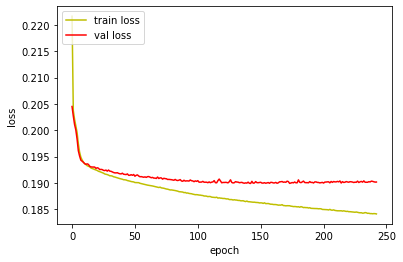

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
# loss_ax.plot([hist['loss'][i] - hist['val_loss'][i] for i in range(len(hist['loss']))], 'g', label='loss - val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

In [13]:
features = np.empty((0,8), float)
for i in range(66):
    features = np.append(features, autoencoder.feature_extract(X_scaled[i*30:(i+1)*30]), axis=0)

print(features.shape)

(1980, 8)


In [25]:
from sklearn.cluster import KMeans
result = KMeans(n_clusters=11).fit(features)

In [16]:
import sys
import numpy

numpy.set_printoptions(threshold=sys.maxsize)
print(result.labels_)

[ 2  7  1  4  2  1  2 10  8  3  4  6  9  3 10  1  7  7  8  5  1  4  5  5
  1  2  1  2  3  3  3 10  1  1 10  3  0  2  1  7  8  1  8  2  7  7  1  7
  7  2  1  3  6  6  6  1 10  1 10  1  2  3 10  4  7  9  8  3  8  3  5  8
  3  3  1 10  0  2  2  5  7  9  1 10  7  2  1  7  2  1  4  7 10  3  7  2
  2  2  1  8  1  1  4  9  2 10  2  3  7  2  2  3  8  3  3  3  1  6  0  1
  3  5  8  2  5  1  2  4  3  7  5  1  5  4  8  7 10  2  4  3  8  1 10  8
  6  5  7  8  4  1  1  1  1  1  8  2  4  7  2  1  1  1  5  2  1  1  0  6
  6  4  4  5  5  7  7  3  1  2  8  2  1  1 10  3  7  8  2  3  9  4  4 10
  8  7  2 10  2  4  3  0  7  6  3  6  7  0  3 10  1  7  5  5  6  2  1  6
  6 10 10 10  2 10  8  6  1  2  9  5  1  4  7  5  1  5  2  2  7  6  2  6
  1 10  4  0  0  4  2  6  7  7  3  7  3  3  1  3  0 10  1  7  4  2  3  4
  4  7  1  5  7  3  0  4  7  2  2  3  7  1  6  7  2  1  7  1  1  7  1  2
  6  5  1  3  1  7  7  4  1  3  1  1  7  3  4  2  1  0  1  1  7  2  7  3
  3  5  7  1 10  6  7  7  7  1  3  7  0  2  1  9 10

In [15]:
import numpy as np
from sklearn.metrics import silhouette_samples,silhouette_score
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km.labels_)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_score(X, y_km.labels_,metric='euclidean')
    print(silhouette_vals)
#     y_ax_lower, y_ax_upper = 0,0
#     yticks = []
    
#     for i , c in enumerate(cluster_labels):
#         c_silhouette_vals = silhouette_vals[y_km.labels_ == c]
#         c_silhouette_vals.sort()
#         y_ax_upper += len(c_silhouette_vals)
#         color = cm.jet(i/n_clusters)
        
#         plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,edgecolor='none', color=color)
#         yticks.append((y_ax_lower + y_ax_upper)/2)
#         y_ax_lower += len(c_silhouette_vals)
    
#     silhouette_avg = np.mean(silhouette_vals)
#     plt.axvline(silhouette_avg, color='red', linestyle='--')
#     plt.yticks(yticks, cluster_labels+1)
#     plt.ylabel('cluster')
#     plt.xlabel('silhouette score')
#     plt.show()

In [26]:
plotSilhouette(features,result)

0.1704536760514606


In [27]:
autoencoder.save("insect_128_8_mse.h5")